# **Import Libraris**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score

## **Load dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Train.csv')

# Display the first few rows of the dataset
display(df.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## **Convert categorical variables to numerical using Label Encoding**

In [5]:
label_encoder = LabelEncoder()
df['Warehouse_block'] = label_encoder.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment'] = label_encoder.fit_transform(df['Mode_of_Shipment'])
df['Product_importance'] = label_encoder.fit_transform(df['Product_importance'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

## **Explore data using correlation matrix and heatmap**

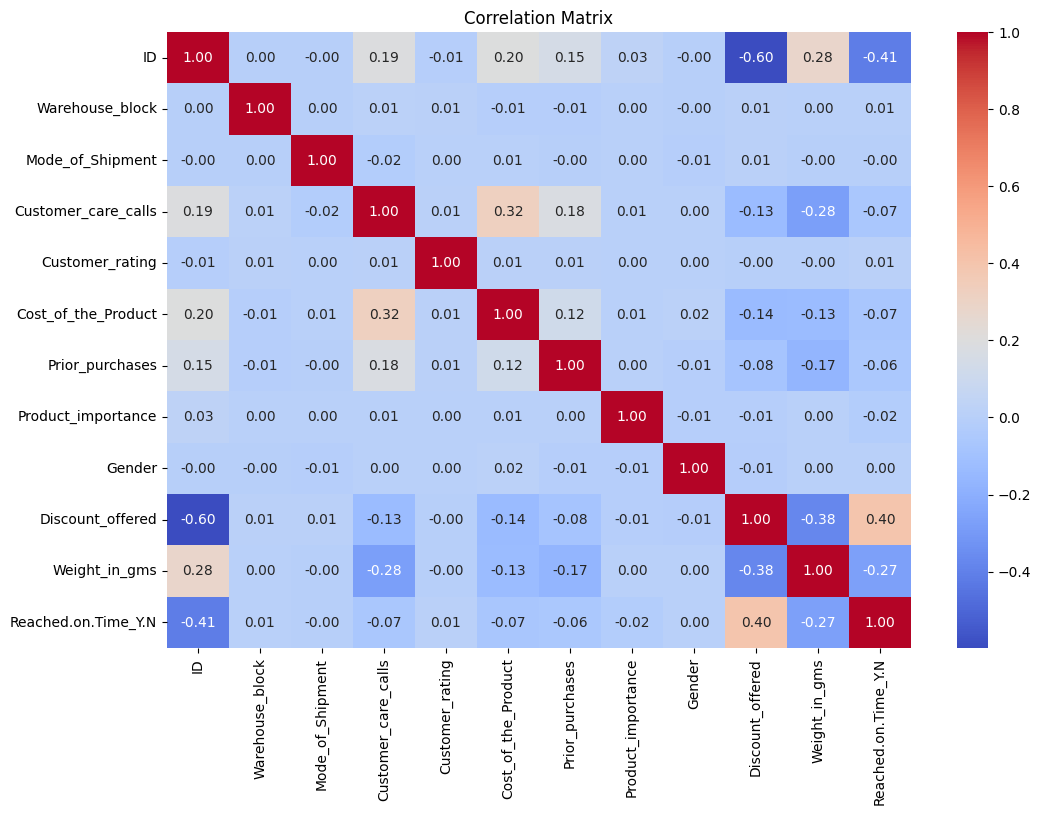

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **Identify the most correlated variables with the target variable**

In [7]:
target_correlation = correlation_matrix['Reached.on.Time_Y.N'].abs().sort_values(ascending=False)
print("Correlation with Target Variable:")
print(target_correlation)

Correlation with Target Variable:
Reached.on.Time_Y.N    1.000000
ID                     0.411822
Discount_offered       0.397108
Weight_in_gms          0.268793
Cost_of_the_Product    0.073587
Customer_care_calls    0.067126
Prior_purchases        0.055515
Product_importance     0.023483
Customer_rating        0.013119
Warehouse_block        0.005214
Gender                 0.004689
Mode_of_Shipment       0.000535
Name: Reached.on.Time_Y.N, dtype: float64


## **Train a Random Forest model to get feature importance**

In [8]:
# Assuming 'Reached.on.Time_Y.N' is binary (0 or 1)
X = df.drop(['ID', 'Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']

## **Split the dataset into training and testing sets**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Train a Random Forest Classifier**

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Get feature importance scores**

In [11]:
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores:")
print(feature_importance)


Feature Importance Scores:
Weight_in_gms          0.297498
Discount_offered       0.208433
Cost_of_the_Product    0.176517
Warehouse_block        0.061332
Customer_rating        0.058972
Customer_care_calls    0.054839
Prior_purchases        0.054295
Mode_of_Shipment       0.032969
Product_importance     0.031093
Gender                 0.024052
dtype: float64


## **Plot feature importance**

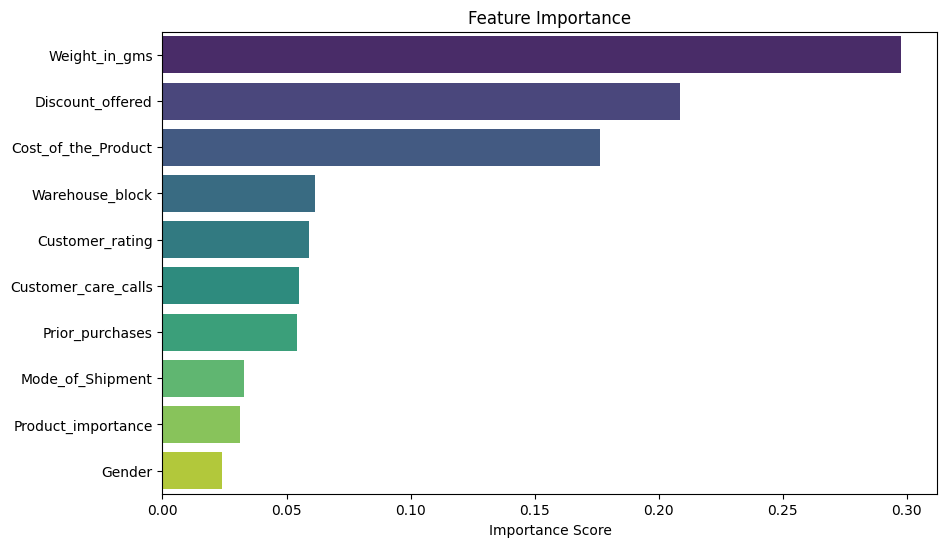

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


## **Predict on the test set** *

In [13]:
y_pred = rf_classifier.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [19]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.76
Recall: 0.64
F1 Score: 0.70
